In [1]:
# Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import pandas_profiling

# Import Collections
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
import graphviz

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [16]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)
wine.columns=['Class_label','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']

In [17]:
wine.head()
wine.shape
wine.Class_label.nunique()
wine.groupby('Class_label').size()
wine.columns
means=np.round(pd.pivot_table(wine,values=['Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline'],index='Class_label',aggfunc=np.mean),2)
means

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 14)

3

Class_label
1    59
2    71
3    48
dtype: int64

Index(['Class_label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

,Alcalinity_of_ash,Alcohol,Ash,Color_intensity,Flavanoids,Hue,Magnesium,Malic_acid,Nonflavanoid_phenols,OD280/OD315_of_diluted_wines,Proline,Total_phenols,proanthocyanins
Class_label,,,,,,,,,,,,,
1,17.04,13.74,2.46,5.53,2.98,1.06,106.34,2.01,0.29,3.16,1115.71,2.84,1.90
2,20.24,12.28,2.24,3.09,2.08,1.06,94.55,1.93,0.36,2.79,519.51,2.26,1.63
3,21.42,13.15,2.44,7.40,0.78,0.68,99.31,3.33,0.45,1.68,629.90,1.68,1.15


,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.387517,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.500000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,1.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(178, 14)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(wine)
wine_scld=pd.DataFrame(arr_scld, columns=wine.columns)
wine_scld.head()
wine_scld.describe()
wine_scld.shape
import warnings
warnings.filterwarnings('ignore')

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.387517,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.500000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,1.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(178, 14)

In [21]:
eda_report = pandas_profiling.ProfileReport(data)
eda_report.to_file('redwine.html')

In [26]:
from sklearn.decomposition import PCA
pca=PCA().fit(wine_scld)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
str(pca.explained_variance_ratio_)

'[0.51003634 0.14853339 0.06702619 0.06257153 0.05009893 0.03837954\n 0.02882988 0.01963591 0.01828022 0.01769633 0.01483498 0.01075837\n 0.00837412 0.00494429]'

In [29]:
str(pca.explained_variance_ratio_.sum())

'0.9999999999999999'

In [31]:
pca=PCA(5).fit(wine_scld)

In [32]:
str(pca.explained_variance_ratio_.sum())

'0.8382663815831852'

In [59]:
pca.explained_variance_
np.round(pca.explained_variance_[0:5].sum()*100)
np.round(pca.explained_variance_[0:5]*100)

array([0.35206798, 0.10252966, 0.04626685, 0.04319189, 0.0345823 ])

58.0

array([35., 10.,  5.,  4.,  3.])

In [37]:
pca_data=pd.DataFrame(pca.components_,columns=wine.columns)
pca_data

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,0.629328,-0.115383,0.186945,-0.006059,0.148984,-0.065467,-0.299078,-0.324799,0.239207,-0.184198,0.080789,-0.201898,-0.371705,-0.240043
1,0.019930,-0.547916,-0.234479,-0.163516,0.076205,-0.184853,-0.062193,0.010154,-0.022068,-0.022682,-0.520149,0.242534,0.227686,-0.437611
2,0.033416,-0.087523,0.493695,0.392512,0.476667,0.017013,0.267904,0.207019,0.232784,0.249258,-0.024221,-0.120159,0.307030,-0.160257
3,-0.292583,0.062226,-0.175475,0.206816,0.040891,-0.114065,-0.100221,-0.074515,0.797526,-0.221260,-0.087601,0.274796,-0.083992,0.177298
4,0.281481,-0.162288,-0.664935,0.234971,0.289926,0.276543,0.204909,0.125318,0.006930,0.253982,0.270441,0.113542,-0.164610,0.034276


<Figure size 720x720 with 0 Axes>

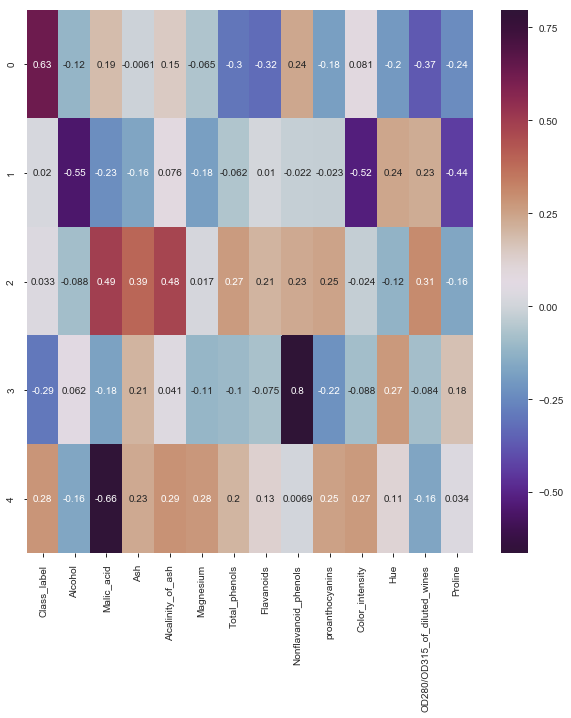

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(pca_data,cmap='twilight_shifted',annot=True)
plt.show()

In [48]:
wine_scld.shape
wine_scld.head()

(178, 14)

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [44]:
wine_scld_transf=pca.fit_transform(wine_scld)

In [46]:
wine_scld_transf=pd.DataFrame(wine_scld_transf,columns=('P1','P2','P3','P4','P5'))
wine_scld_transf.head()
wine_scld_transf.shape

,P1,P2,P3,P4,P5
0,-0.847604,-0.243146,0.029752,-0.047430,-0.002728
1,-0.678651,-0.005712,-0.283970,0.001458,-0.248171
2,-0.700372,-0.183868,0.197457,0.004297,0.049228
3,-0.936076,-0.566967,0.093919,-0.110809,0.092336
4,-0.454077,-0.063348,0.286092,0.179782,0.008012


(178, 5)

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

Text(10, 0.8, 'Selected Components')

Text(44, 1.0, 'Full components')

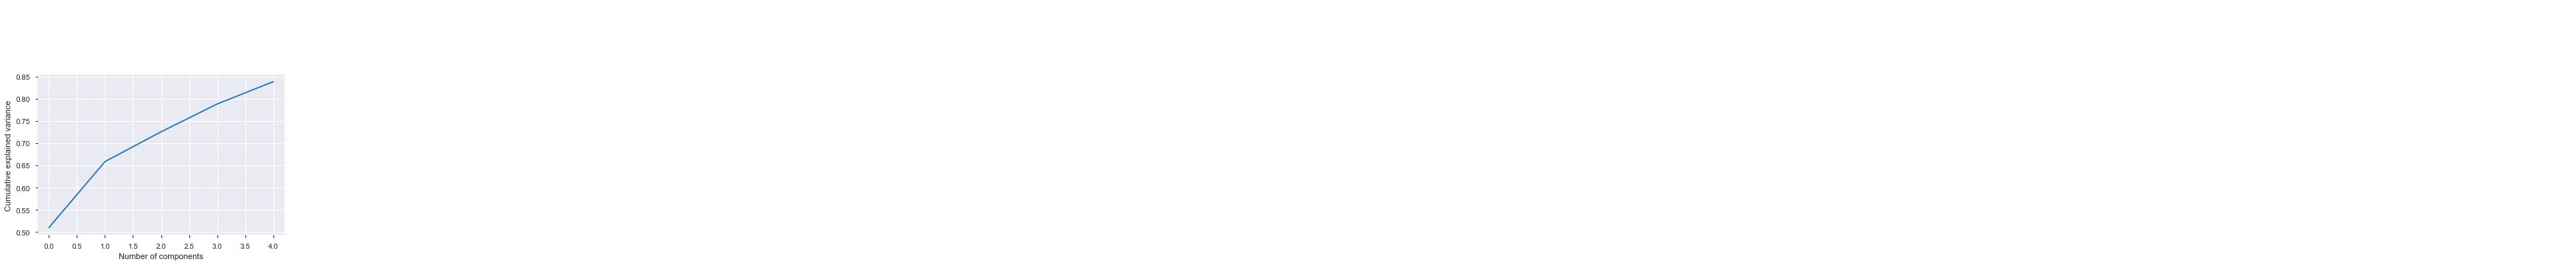

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate("Selected Components",xy=(10,0.8))
plt.annotate("Full components",xy=(44,1.0))